# Movie Earnings prediction
# Capstone Project

- **Name :** Neel Vaswani     
    **Student ID :** 2538560

# Table of Contents

* [Importing Packages](#1)
* [Importing Dataset](#2)
* [Exploratory data analysis](#3)
* [Data Preparation](#4)
* [Creating feature and target dataframes](#5)
* [Splitting the data](#6)
* [Building the Models](#7)
    * [Linear Regression](#7.1)
* [Evaluating the model](#8)
* [Creating function for UI](#9)
* [Creating Tkinter UI](#10)
* [References](#11)

## Importing Packages  <a id="1"></a>

In [1]:
# import Standard python Packages
import io
import pandas as pd                                            # to work on dataframes
import numpy as np                                             # To work on arrays and number manipulations
import matplotlib.pyplot as plt                                # to plot graphs

# import encoders for data encoding
from sklearn.preprocessing import LabelEncoder                 # to encode the categorical data

# import model selection to train, test and split
from sklearn.model_selection import train_test_split           # to split the input data for train and test



#importing the ML models
from sklearn.linear_model import LinearRegression              # importing regressor model

#importing accuracy_score from sklearn.metrics
#The accuracy score which helps in calculating the train and test accuracy based on the number of correctly classified data
from sklearn.metrics import accuracy_score


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle


# import library tkinter
import tkinter as tk
from tkinter import *

## Importing Dataset  <a id="2"></a>

In [2]:
# import or the read the movies dataset that we created
df2 = pd.read_excel('Database.xlsx')

In [3]:
# to scan through the data and understand the filed
df2.head()

,Name,Category,Lead Actor(s),Director,Earnings (M)
0,Avatar,Fantasy,Sam Washington,James Cameron,760.51
1,Logan,Superhero,Hugh Jackman,James Mangold,226.28
2,The Suicide Squad,Superhero,John Cena,James Gunn,55.82
3,Guardians of The Galaxy series,Superhero,Chris Pratt,James Gunn,361.50
4,Batman Trilogy,Superhero,Christian Bale,Christopher Nolan,396.60


In [4]:
# to get the overview of the data frame we create, to understand the object data types and Not null counts
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           59 non-null     object 
 1   Category       59 non-null     object 
 2   Lead Actor(s)  59 non-null     object 
 3   Director       59 non-null     object 
 4   Earnings (M)   58 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.4+ KB


In [5]:
# get the null counts in the dataset to understand what cleaning will be required
df2.isnull().sum()

Name             0
Category         0
Lead Actor(s)    0
Director         0
Earnings (M)     1
dtype: int64

- As we can see from the above resultset that we have 1 NULL in our dataset for earnings, so we need data cleaning

In [6]:
#Dropping the null from the dataset
df2=df2.dropna()

## Exploratory Data Analysis  <a id="3"></a>

#### 1. Earnings per Category

In [7]:
# creating a dataframe to aggregate or summarize the category per earnings
df3=df2[["Category","Earnings (M)"]]
df3.head()

,Category,Earnings (M)
0,Fantasy,760.51
1,Superhero,226.28
2,Superhero,55.82
3,Superhero,361.50
4,Superhero,396.60


In [8]:
# Creating summary data frame
# Using as_index=False
#dfcatAvg = df3.groupby('Category', as_index =False)['Earnings (M)'].mean()

# Using reset_index()
dfcatAvg = df3.groupby(['Category'])['Earnings (M)'].mean().reset_index()
dfcatAvg = dfcatAvg.sort_values(by='Earnings (M)', ascending=False)
dfcatAvg

,Category,Earnings (M)
4,Fantasy,760.510000
3,Drama,362.856667
8,Superhero,313.053333
7,Sci-Fi,175.058462
9,Thriller,158.167500
1,Comedy,148.702500
0,Adventure,144.175000
2,Crime,107.697500
5,Horror,104.836667
6,Mystery,93.635000


Text(0.5, 1.0, 'Earning per Category')

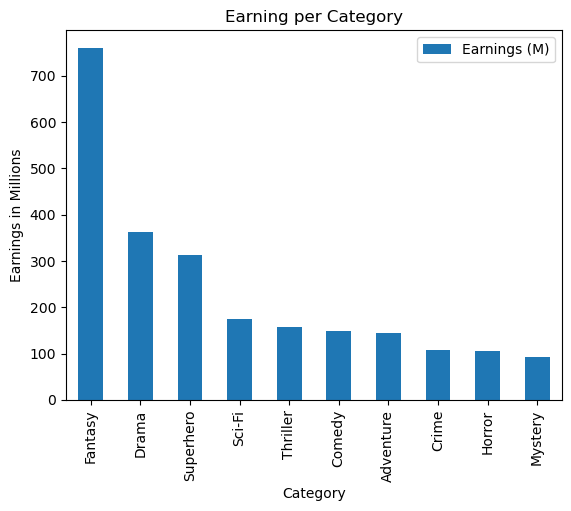

In [9]:
# plotting the catrgory per earnings
ax = dfcatAvg.plot.bar(x='Category', y='Earnings (M)', rot=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Earnings in Millions')
ax.set_xlabel('Category')
ax.set_title('Earning per Category')

- As we can see from the above graph that Fantasy category has the highest earnings, whereas the mystery has the lowest

#### 2. Top 10 Directors with highest Earnings

In [10]:
df4=df2[["Director","Earnings (M)"]]
df4.head()

,Director,Earnings (M)
0,James Cameron,760.51
1,James Mangold,226.28
2,James Gunn,55.82
3,James Gunn,361.50
4,Christopher Nolan,396.60


In [11]:
# Using reset_index()
dfDir= df4.groupby(['Director'])['Earnings (M)'].mean().reset_index()
dfDir=dfDir.sort_values(by='Earnings (M)', ascending=False)
dfDir=dfDir.head(10)
dfDir

,Director,Earnings (M)
28,Russo Brothers,457.320000
16,Joseph Kosinski,445.395000
30,Sam Raimi,371.270000
36,Tim Miller,363.070000
15,Jon Watts,362.365000
23,Peter Jackson,359.670000
34,Taika Waititi,343.260000
39,Zack Snyder,325.246667
5,David Leitch,324.590000
27,Roland Emmerich,306.170000


Text(0.5, 1.0, 'Top 10 Directors with Earnings in Millions')

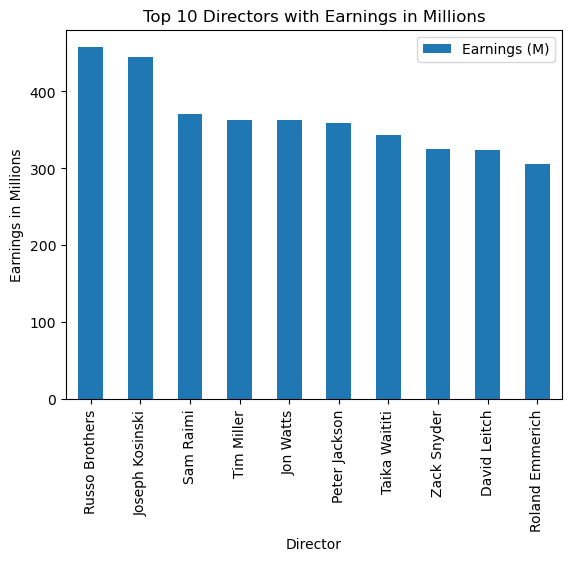

In [12]:
ay = dfDir.plot.bar(x='Director', y='Earnings (M)', rot=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ay.set_ylabel('Earnings in Millions')
ay.set_xlabel('Director')
ay.set_title('Top 10 Directors with Earnings in Millions')

- We can see from the above graph the top 10 Directors with highest earnings

## Label encoding the categorical data/ Data preparation  <a id="4"></a>

In [13]:
X_df =  df2[['Category', 'Lead Actor(s)', 'Director']]
#Shape of feature data frame
print(X_df.shape)

#fetching top 5 records of features
X_df.head()

(58, 3)


,Category,Lead Actor(s),Director
0,Fantasy,Sam Washington,James Cameron
1,Superhero,Hugh Jackman,James Mangold
2,Superhero,John Cena,James Gunn
3,Superhero,Chris Pratt,James Gunn
4,Superhero,Christian Bale,Christopher Nolan


In [14]:
num_col = X_df._get_numeric_data().columns
all_col = X_df.columns.tolist()
cat_columns = [i for i in all_col if i not in num_col]
cat_columns

['Category', 'Lead Actor(s)', 'Director']

In [15]:

encoders = {}
for i in cat_columns:
    encoders[i] = LabelEncoder()
    X_df[i] = encoders[i].fit_transform(X_df[i])
    
X_df.head()

C:\Users\neelv\AppData\Local\Temp\ipykernel_2448\628140666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[i] = encoders[i].fit_transform(X_df[i])
C:\Users\neelv\AppData\Local\Temp\ipykernel_2448\628140666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[i] = encoders[i].fit_transform(X_df[i])
C:\Users\neelv\AppData\Local\Temp\ipykernel_2448\628140666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Category,Lead Actor(s),Director
0,4,29,10
1,8,16,12
2,8,21,11
3,8,6,11
4,8,7,3


## Creating Features and Target DataFrame <a id="5"></a>

In [16]:
X_df =  X_df[['Category', 'Lead Actor(s)', 'Director']]
#Shape of feature data frame
print(X_df.shape)

#fetching top 5 records of features
X_df.head()

(58, 3)


,Category,Lead Actor(s),Director
0,4,29,10
1,8,16,12
2,8,21,11
3,8,6,11
4,8,7,3


In [17]:
Y_df= df2[['Earnings (M)']]
print(Y_df.shape)
Y_df.head()

(58, 1)


,Earnings (M)
0,760.51
1,226.28
2,55.82
3,361.50
4,396.60


## Train Test split of the Dataset <a id="6"></a>

In [18]:
#using train test split function to divide the data set into 80-20 portions
#80 for training and 20 for testing

X_train,X_test, y_train, y_test = train_test_split(X_df,Y_df,test_size=0.20,random_state = 0)

In [19]:
print("Training data percentage is {:.2f}".format(len(X_train)/len(df2)*100)+" %")
#Test accuracy percentage
print("Test data percentage is {:.2f}".format((len(X_test)/len(df2))*100)+" %")

print("\n")

#Tain and test feature dataset shapes
print("Features train shape"+str(X_train.shape))
print("Features test shape"+str(X_test.shape))

print("\n")

#Tain and test target dataset shapes
print("Target train shape"+str(y_train.shape))
print("Target test shape"+str(y_test.shape))

Training data percentage is 79.31 %
Test data percentage is 20.69 %


Features train shape(46, 3)
Features test shape(12, 3)


Target train shape(46, 1)
Target test shape(12, 1)


## Building the model <a id="7"></a>

### Linear Regression Model <a id="7.1"></a>

In [20]:
# Building the linear regression model
linreg= LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Evaluating Model <a id="8"></a>

## Predictions and the co-efficients and intercepts of model

In [21]:
y_predictions = linreg.predict(X_test)
print('Predictions:', y_predictions)
# get the coefficients and intercept
print("Coefficients:\n", linreg.coef_)
print('Intercept:\n', linreg.intercept_)

Predictions: [[159.98487681]
 [229.65178267]
 [154.87330141]
 [170.11725904]
 [271.43441698]
 [242.943566  ]
 [193.70330324]
 [220.88944331]
 [205.50257219]
 [220.88944331]
 [208.66992156]
 [264.68548767]]
Coefficients:
 [[12.52115511  1.66303463  1.37389496]]
Intercept:
 [92.73775344]


In [22]:
#calculating train accuracy for without scaled data for logistic regression
train_lr_accuracy = linreg.score(X_train,y_train)
print("Train accuracy of Logistic regression {:.2f}".format(train_lr_accuracy*100)+"%")


Train accuracy of Logistic regression 6.02%


 ### Saving the model and testing prediction

In [23]:
filename = 'linreg.sav'
pickle.dump(linreg, open(filename, 'wb'))

## Creating function for UI <a id="9"></a>

#### Creating function to call from UI

In [24]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))

#making function
def predict():
    Category = inp1.get()
    Actor = inp2.get()
    Director = inp3.get()

    try:
        Category = str(Category)
        Actor = str(Actor)
        Director = str(Director)
        
        #creating data from of user input
        input_df=pd.DataFrame([[Category,Actor,Director]],columns=['Category', 'Lead Actor(s)', 'Director'])
        #input_df
        
        for i in cat_columns:
            input_df[i] = encoders[i].transform(input_df[i])
        
        #Predict_label['text'] = [*predict_model(loaded_model, data=results)['Label'].values][0]
        results = loaded_model.predict(input_df)[0][0]
        Predict_label['text'] = "Earnings in Millions: " + str(round(results,2))
        
    except ValueError:
        messagebox.showinfo("Alert Message", "Data not entered correctly !") # this code to make alert messages when we wrong input data

### Creating tkinter UI <a id="10"></a>

In [25]:
wdw = tk.Tk()
wdw.title("Simulation predict!") #mengubah nama jendela

#Category
inp1 = tk.Entry(wdw)
inp1.insert(0,'')
inp1.grid(row=1,column=1)
Category_label = tk.Label(wdw, text="Enter the Category of the movie: ")
Category_label.grid(row=1,column=0)

#Lead Actor
inp2 = tk.Entry(wdw)
inp2.insert(0,'')
inp2.grid(row=2,column=1)
Actor_label = tk.Label(wdw, text="Enter the Lead Actor of the movie: ")
Actor_label.grid(row=2,column=0)

#Director
inp3 = tk.Entry(wdw)
inp3.insert(0,'')
inp3.grid(row=3,column=1)
Director_label = tk.Label(wdw, text="Enter Director of the movie:")
Director_label.grid(row=3,column=0)


Predict = tk.Button(wdw, text = "Click to predict!", command=predict)
Predict.grid(row=12,columnspan=2)
Predict_label = tk.Label(wdw, text="Earnings in Millions ...")
Predict_label.grid(row=11,columnspan=2)


wdw.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\neelv\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 224, in _encode
    return _map_to_integer(values, uniques)
  File "C:\Users\neelv\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 164, in _map_to_integer
    return np.array([table[v] for v in values])
  File "C:\Users\neelv\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 164, in <listcomp>
    return np.array([table[v] for v in values])
  File "C:\Users\neelv\anaconda3\lib\site-packages\sklearn\utils\_encode.py", line 158, in __missing__
    raise KeyError(key)
KeyError: 'Hugh Jackmann'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\neelv\AppData\Local\Temp\ipykernel_2448\4276333981.py", line 20, in predict
    input_df[i] = encoders[i].transform(input_df[i])
  File "C:\Users\neelv\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", l

## References <a id="11"></a>

References:
- https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
- https://medium.com/geekculture/pycaret-machine-learning-development-and-deployment-on-tkinter-3433a539c5c4
- https://copyprogramming.com/howto/value-error-y-contains-previously-unseen-labels
